# Redshift-space Correlation Function

In this example we will calculate the the redshift-space correlation function $\xi(\pi,\sigma)$ in the linear (Kaiser) approximation. Here, $\pi$ and $\sigma$ are the galaxy pair separations along the line of sight and perpendicular to the line of sight, respectively. We also calculate the redshift-space correlation function $\xi(s)$, the average of $\xi(\pi,\sigma)$ at constant $s$, where $s$ is the galaxy separation in redshift space.

In [233]:
import numpy as np
import pyccl as ccl
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

In [234]:
#  nonlinear power spectrum with Boltzmann CLASS tranfer function
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96,transfer_function='boltzmann_class', 
                      matter_power_spectrum='halofit')
#  linaer power spectrum with BBKS transfer funtion
cosmo_lin = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, transfer_function='bbks', 
                          matter_power_spectrum='linear')

Create array for distances, define parameters.

In [235]:
N = 200 # no. points for distance arrays
l = 50 # max value for distance arrays in Mpc
pi = np.linspace(-l,l,N)
sigma = np.linspace(-l,l,N)
a = 1.0 # scale factor
h = 0.7 # Hubble constant
beta = 0.4 # growth factor divided by bias

Calculate $\xi(\pi,\sigma)$ and plot

In [236]:
Xi = np.ones([N,N]); # initialize array for xi(pi, sigma)
Xi_lin = np.ones([N,N]);

for i in range(N):
    Xi[i]=ccl.correlation_pi_sigma(cosmo,a,beta,pi[i],sigma,True);
       
ccl.correlation_spline_free()

for i in range(N):
    Xi_lin[i]=ccl.correlation_pi_sigma(cosmo_lin,a,beta,pi[i],sigma,True); 

/home/ellison/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1544: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


Text(0.5,1,'Linear BBKS')

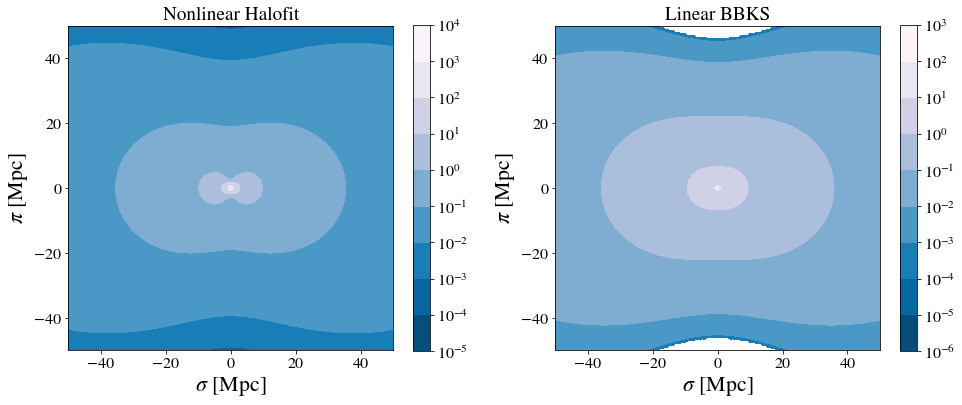

In [237]:
# plot as filled contour - nonlinear P(k)
fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.add_subplot(121)
ax1.set_xlabel(r'$\sigma$ $[\rm{Mpc}]$',fontsize=22)
ax1.set_ylabel(r'$\pi$ $[\rm{Mpc}]$',fontsize=22)
xi_ps=plt.contourf(sigma, pi, Xi, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig1.colorbar(xi_ps)
ax1.set_aspect('equal', 'box')
plt.title('Nonlinear Halofit')

# plot as filled contour - linear P(k) 
ax2 = fig1.add_subplot(122)
ax2.set_xlabel(r'$\sigma$ $[\rm{Mpc}]$',fontsize=22)
ax2.set_ylabel(r'$\pi$ $[\rm{Mpc}]$',fontsize=22)
xi_ps=plt.contourf(sigma, pi, Xi_lin, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig1.colorbar(xi_ps)
ax2.set_aspect('equal', 'box')
plt.title('Linear BBKS')
#plt.savefig('xiRsd_contourFilled.pdf',bbox_inches = 'tight')

# Note: Because this is a log-z plot, negative values will be masked and a warning issued


Text(0.5,1,'Linear BBKS')

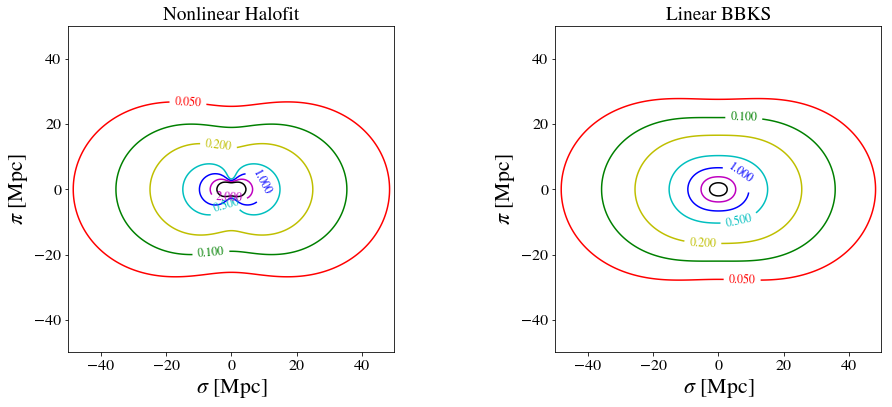

In [238]:
# plot with selected contours - nonlinear P(k)
v = [0.05,0.1,0.2,0.5,1.,2.,4.]
#plt.figure(figsize = (7,7))

fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.add_subplot(121)
CP=plt.contour(sigma,pi,Xi,v,colors=('r', 'g', 'y', 'c', 'b', 'm', 'k'))
plt.clabel(CP, inline=1, fontsize=12)
plt.xlabel(r'$\sigma$ $[\rm{Mpc}]$',fontsize=22)
plt.ylabel(r'$\pi$ $[\rm{Mpc}]$',fontsize=22)
#plt.grid()
ax1.set_aspect('equal', 'box')
plt.title('Nonlinear Halofit')

# plot with selected contours - nonlinear P(k)
ax2 = fig1.add_subplot(122)
CP_lin=plt.contour(sigma,pi,Xi_lin,v,colors=('r', 'g', 'y', 'c', 'b', 'm', 'k'))
plt.clabel(CP_lin, inline=1, fontsize=12)
plt.xlabel(r'$\sigma$ $[\rm{Mpc}]$',fontsize=22)
plt.ylabel(r'$\pi$ $[\rm{Mpc}]$',fontsize=22)
ax2.set_aspect('equal', 'box')
plt.title('Linear BBKS')
#plt.grid()
#plt.savefig('xiRsd_countourLines.pdf',bbox_inches = 'tight')

Calculate $\xi(s)$ and plot

In [239]:
n_s = 10000 # number of points for s array (s = separation between the two galaxies)
s_arr=np.logspace(-2,3,n_s)
xi = ccl.correlation_3dRsd_avgmu(cosmo,a,s_arr,beta)
xi_lin = ccl.correlation_3dRsd_avgmu(cosmo_lin,a,s_arr,beta)

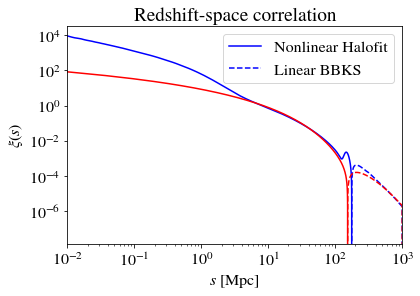

In [240]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
# array for storing legend
legarray = []

# Define array to hold only the values of xi(s) that are negative, so they can be plotted as a dashed line on log plot
xin = [0.]*n_s # negative xi values
xin_lin = [0.]*n_s
for i in range (0,n_s-1):
    if xi[i] < 0:
        xin[i] = -xi[i]
        
for i in range (0,n_s-1):
    if xi_lin[i] < 0:
        xin_lin[i] = -xi_lin[i]

plt.loglog(s_arr,xi,'b-')
legarray.append(r'Nonlinear Halofit')
plt.loglog(s_arr,xin,'b--')
plt.loglog(s_arr,xi_lin,'r-')
legarray.append(r'Linear BBKS')
plt.loglog(s_arr,xin_lin,'r--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$s$ $[\rm{Mpc}]$')
plt.ylabel(r'$\xi(s)$')
plt.title('Redshift-space correlation') 
plt.xlim((0.01,1000))
plt.legend(legarray)
#plt.savefig('xiRsd3.pdf',bbox_inches = 'tight')
plt.show()


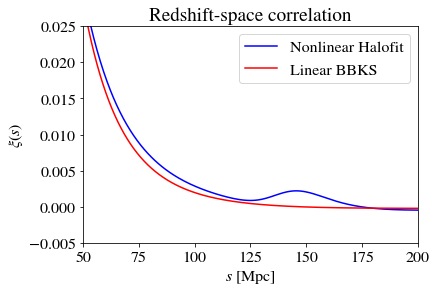

In [241]:
# now plot large s region on linear scale
legarray = []
plt.plot(s_arr, xi, 'b-')
legarray.append(r'Nonlinear Halofit')
plt.plot(s_arr, xi_lin, 'r-')
legarray.append(r'Linear BBKS')
plt.xlim((50,200))
plt.ylim((-0.005,0.025))
plt.xlabel(r'$s$ $[\mathrm{Mpc}]$')
plt.ylabel(r'$\xi (s)$')
plt.title('Redshift-space correlation') 
plt.legend(legarray)
#plt.savefig('xiRsd4.pdf',bbox_inches = 'tight')
plt.show()

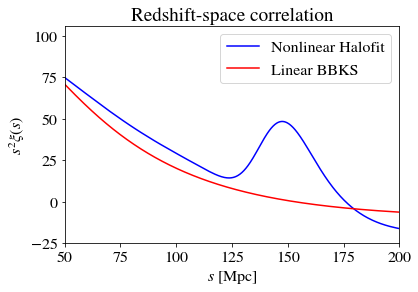

BAO peak: s = 145.51785742140763
          xi(s) = 0.0022558493802056286
          s^2 xi(s) = 47.76861860368758


In [242]:
# plot s^2 xi(s)
legarray = []
plt.plot(s_arr, s_arr*s_arr*xi, 'b-')
legarray.append(r'Nonlinear Halofit')
plt.plot(s_arr, s_arr*s_arr*xi_lin, 'r-')
legarray.append(r'Linear BBKS')
plt.xlim((50,200))
plt.xlabel(r'$s$ $[\mathrm{Mpc}]$')
plt.ylabel(r'$s^2 \xi (s)$')
plt.title('Redshift-space correlation') 
plt.legend(legarray)
plt.savefig('xiRsd4.pdf',bbox_inches = 'tight')
plt.show()

# find the BAO peak position and value
max_value = 0
max_value_index = 0
for i in range(8200,8490):
    #print(i, s_arr[i], xi[i])
    if xi[i] > max_value:
        max_value = xi[i]
        max_value_index = i
print(f'BAO peak: s = {s_arr[max_value_index]}')  
print(f'          xi(s) = {max_value}') 
print(f'          s^2 xi(s) = {s_arr[max_value_index]*s_arr[max_value_index]*max_value}')

In [243]:
ccl.correlation_spline_free()